In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Train_data.csv')

In [3]:
df.head()

id  acousticness  danceability  energy explicit  instrumentalness  key  \
0   2015         0.949         0.235  0.0276       No            0.9270    5   
1  15901         0.855         0.456  0.4850       No            0.0884    4   
2   9002         0.827         0.495  0.4990       No            0.0000    0   
3   6734         0.654         0.643  0.4690       No            0.1080    7   
4  15563         0.738         0.705  0.3110       No            0.0000    5   

   liveness  loudness   mode release_date  speechiness    tempo  valence  \
0     0.513   -27.398  Major   01-01-1947       0.0381  110.838   0.0398   
1     0.151   -10.046  Major   13-11-2020       0.0437  152.066   0.8590   
2     0.401    -8.009  Minor   01-01-1950       0.0474  108.004   0.7090   
3     0.218   -15.917  Major   30-04-1974       0.0368   83.636   0.9640   
4     0.322   -12.344  Major   01-01-1973       0.0488  117.260   0.7850   

   year  duration-min popularity  
0  1947           3.0   very low  
1  2020           2.4        low  
2  1950           2.6   very low  
3  1974           2.4        low  
4  1973           3.4    average

In [4]:
df.shape

(12227, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12227 non-null  int64  
 1   acousticness      12227 non-null  float64
 2   danceability      12227 non-null  float64
 3   energy            12227 non-null  float64
 4   explicit          12227 non-null  object 
 5   instrumentalness  12227 non-null  float64
 6   key               12227 non-null  int64  
 7   liveness          12227 non-null  float64
 8   loudness          12227 non-null  float64
 9   mode              12227 non-null  object 
 10  release_date      12227 non-null  object 
 11  speechiness       12227 non-null  float64
 12  tempo             12227 non-null  float64
 13  valence           12227 non-null  float64
 14  year              12227 non-null  int64  
 15  duration-min      12227 non-null  float64
 16  popularity        12227 non-null  object

In [6]:
df.isnull().sum()

id                  0
acousticness        0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration-min        0
popularity          0
dtype: int64

In [7]:
df['explicit'].value_counts()

No     10906
Yes     1321
Name: explicit, dtype: int64

In [8]:
df['mode'].value_counts()

Major    8487
Minor    3740
Name: mode, dtype: int64

In [9]:
df['release_date'].value_counts()

01-01-1961    90
01-01-1962    88
01-01-1992    85
01-01-1998    84
01-01-1945    82
              ..
24-07-1974     1
16-06-1971     1
12-03-1975     1
19-11-1991     1
05-12-2016     1
Name: release_date, Length: 3859, dtype: int64

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df['year']= df['release_date'].dt.year
df['month']= df['release_date'].dt.month
df['day']= df['release_date'].dt.day
df

id  acousticness  danceability  energy explicit  instrumentalness  \
0       2015        0.9490        0.2350  0.0276       No          0.927000   
1      15901        0.8550        0.4560  0.4850       No          0.088400   
2       9002        0.8270        0.4950  0.4990       No          0.000000   
3       6734        0.6540        0.6430  0.4690       No          0.108000   
4      15563        0.7380        0.7050  0.3110       No          0.000000   
...      ...           ...           ...     ...      ...               ...   
12222  15343        0.0408        0.8090  0.8010       No          0.000000   
12223   1701        0.9120        0.4510  0.2400       No          0.000002   
12224   3351        0.3280        0.5510  0.5640       No          0.002950   
12225   8879        0.1220        0.0608  0.9390       No          0.991000   
12226   9711        0.0380        0.3890  0.7680      Yes          0.000000   

       key  liveness  loudness   mode release_date  speechiness    tempo  \
0        5     0.513   -27.398  Major   1947-01-01       0.0381  110.838   
1        4     0.151   -10.046  Major   2020-11-13       0.0437  152.066   
2        0     0.401    -8.009  Minor   1950-01-01       0.0474  108.004   
3        7     0.218   -15.917  Major   1974-04-30       0.0368   83.636   
4        5     0.322   -12.344  Major   1973-01-01       0.0488  117.260   
...    ...       ...       ...    ...          ...          ...      ...   
12222    1     0.353    -5.461  Major   2014-01-07       0.4070   81.940   
12223    1     0.175   -14.014  Major   1959-01-01       0.0351  134.009   
12224    2     0.352    -9.298  Minor   1984-01-01       0.0338  124.883   
12225    1     0.912   -26.324  Major   2017-09-01       0.1180   73.234   
12226    1     0.119    -4.765  Major   2020-07-24       0.2560   90.146   

       valence  year  duration-min popularity  month  day  
0      0.03980  1947           3.0   very low      1    1  
1      0.85900  2020           2.4        low     11   13  
2      0.70900  1950           2.6   very low      1    1  
3      0.96400  1974           2.4        low      4   30  
4      0.78500  1973           3.4    average      1    1  
...        ...   ...           ...        ...    ...  ...  
12222  0.74400  2014           3.4    average      1    7  
12223  0.70100  1959           2.0  very high      1    1  
12224  0.89000  1984           2.5        low      1    1  
12225  0.00558  2017           3.1       high      9    1  
12226  0.33400  2020           3.1       high      7   24  

[12227 rows x 19 columns]

In [12]:
df.dtypes

id                           int64
acousticness               float64
danceability               float64
energy                     float64
explicit                    object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                        object
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
duration-min               float64
popularity                  object
month                        int64
day                          int64
dtype: object

In [13]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  16


id  acousticness  danceability  energy  instrumentalness  key  liveness  \
0   2015         0.949         0.235  0.0276            0.9270    5     0.513   
1  15901         0.855         0.456  0.4850            0.0884    4     0.151   
2   9002         0.827         0.495  0.4990            0.0000    0     0.401   
3   6734         0.654         0.643  0.4690            0.1080    7     0.218   
4  15563         0.738         0.705  0.3110            0.0000    5     0.322   

   loudness release_date  speechiness    tempo  valence  year  duration-min  \
0   -27.398   1947-01-01       0.0381  110.838   0.0398  1947           3.0   
1   -10.046   2020-11-13       0.0437  152.066   0.8590  2020           2.4   
2    -8.009   1950-01-01       0.0474  108.004   0.7090  1950           2.6   
3   -15.917   1974-04-30       0.0368   83.636   0.9640  1974           2.4   
4   -12.344   1973-01-01       0.0488  117.260   0.7850  1973           3.4   

   month  day  
0      1    1  
1     11   13  
2      1    1  
3      4   30  
4      1    1

In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['year']+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [15]:
discrete_feature

['key', 'month']

## Univariate Analysis

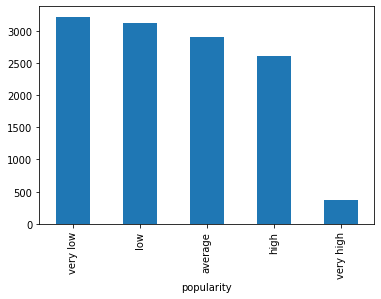

In [16]:
group_pop=df.groupby(["popularity"])
size=group_pop.size().sort_values(ascending=False)
#plt.figure(figsize=(8,7))
size.plot(kind='bar')

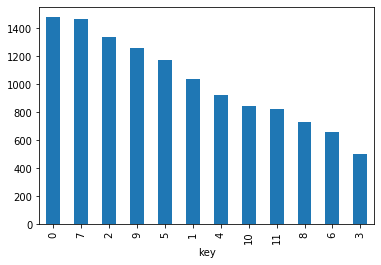

In [17]:
group_key=df.groupby(["key"])
size=group_key.size().sort_values(ascending=False)
#plt.figure(figsize=(8,7))
size.plot(kind='bar')

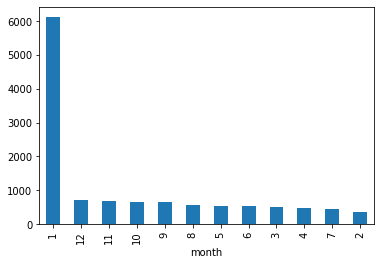

In [18]:
group_month=df.groupby(["month"])
size=group_month.size().sort_values(ascending=False)
#plt.figure(figsize=(8,7))
size.plot(kind='bar')

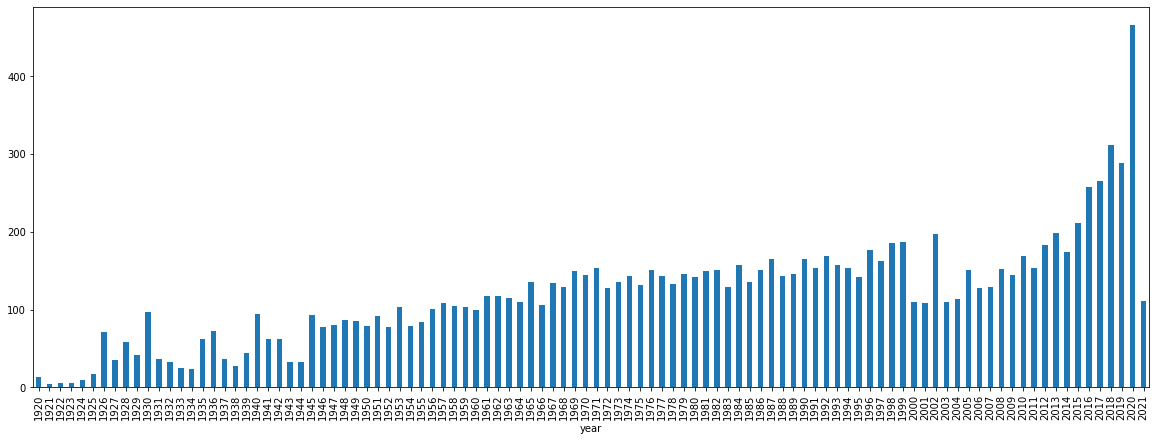

In [19]:
group_pop=df.groupby(["year"])
size=group_pop.size()
plt.figure(figsize=(20,7))
size.plot(kind='bar')

In [20]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['release_date']+['year']+['Id']+['day']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 11


In [21]:
continuous_feature

['id',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'duration-min']

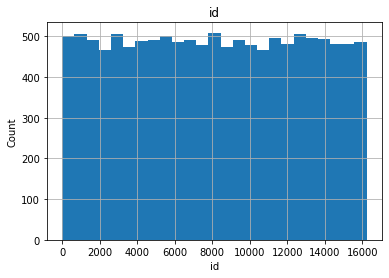

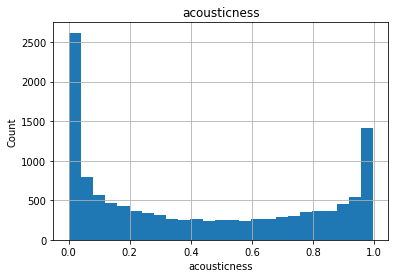

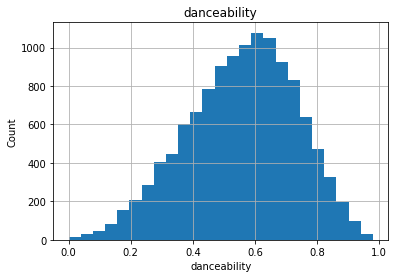

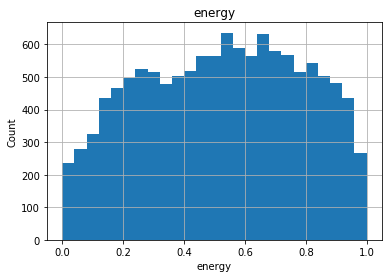

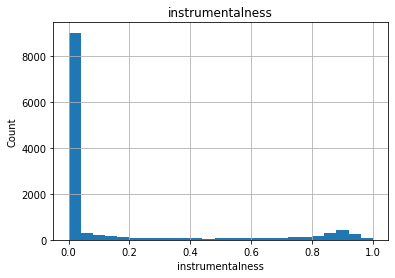

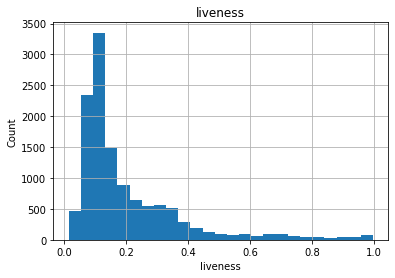

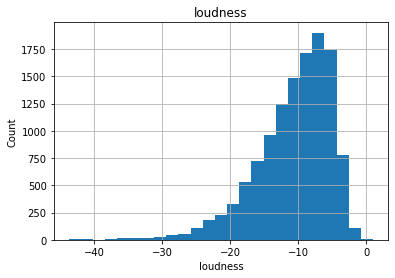

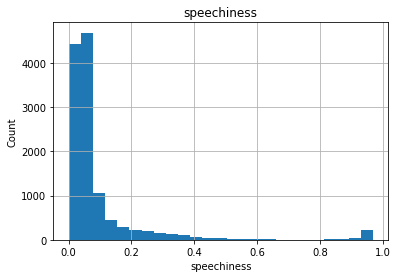

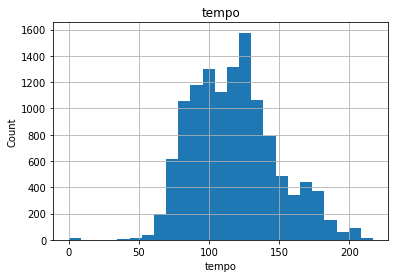

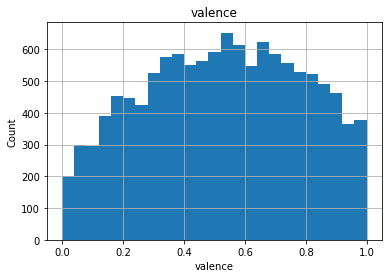

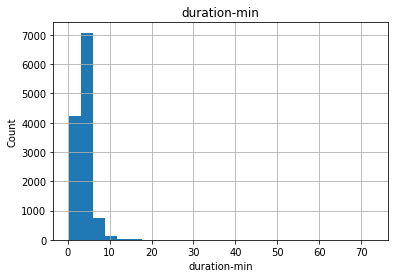

In [22]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Bivariate Analysis

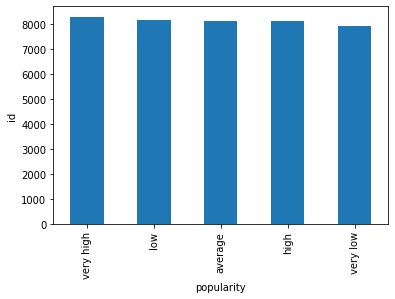

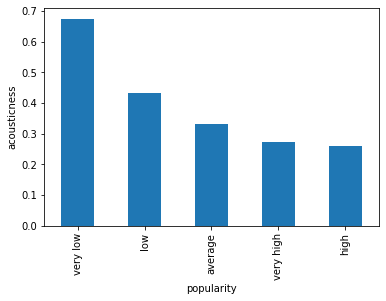

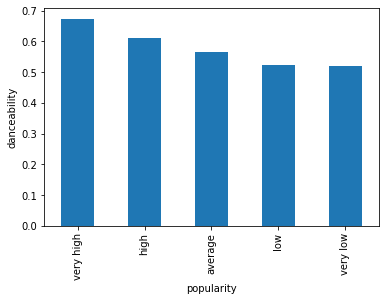

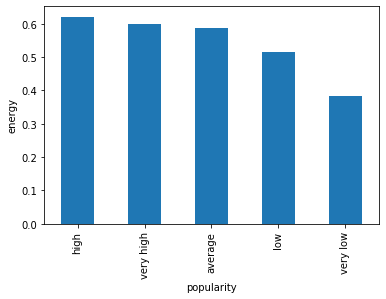

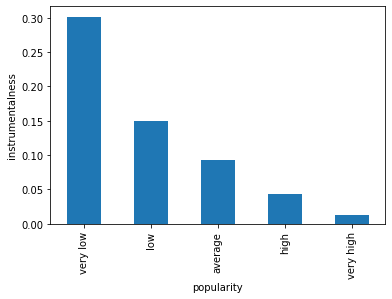

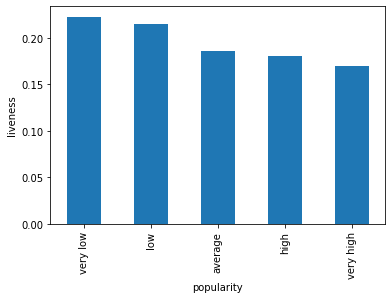

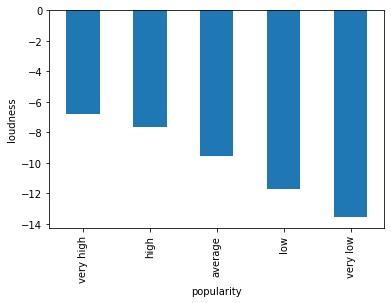

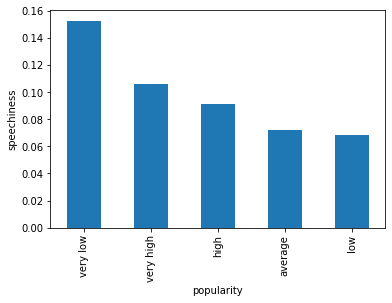

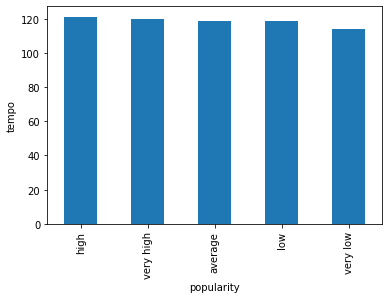

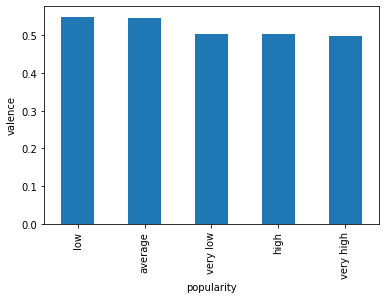

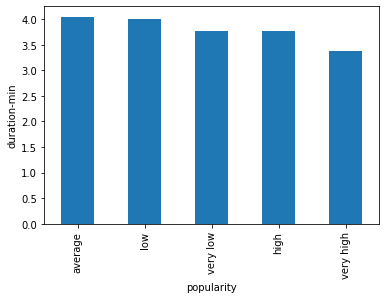

In [23]:
for feature in continuous_feature:
    data=df.copy()
    group_pop=data.groupby(['popularity'])
    group_f=group_pop[feature].mean().sort_values(ascending=False)
    group_f.plot(kind='bar')
    plt.ylabel(feature)
    plt.show()

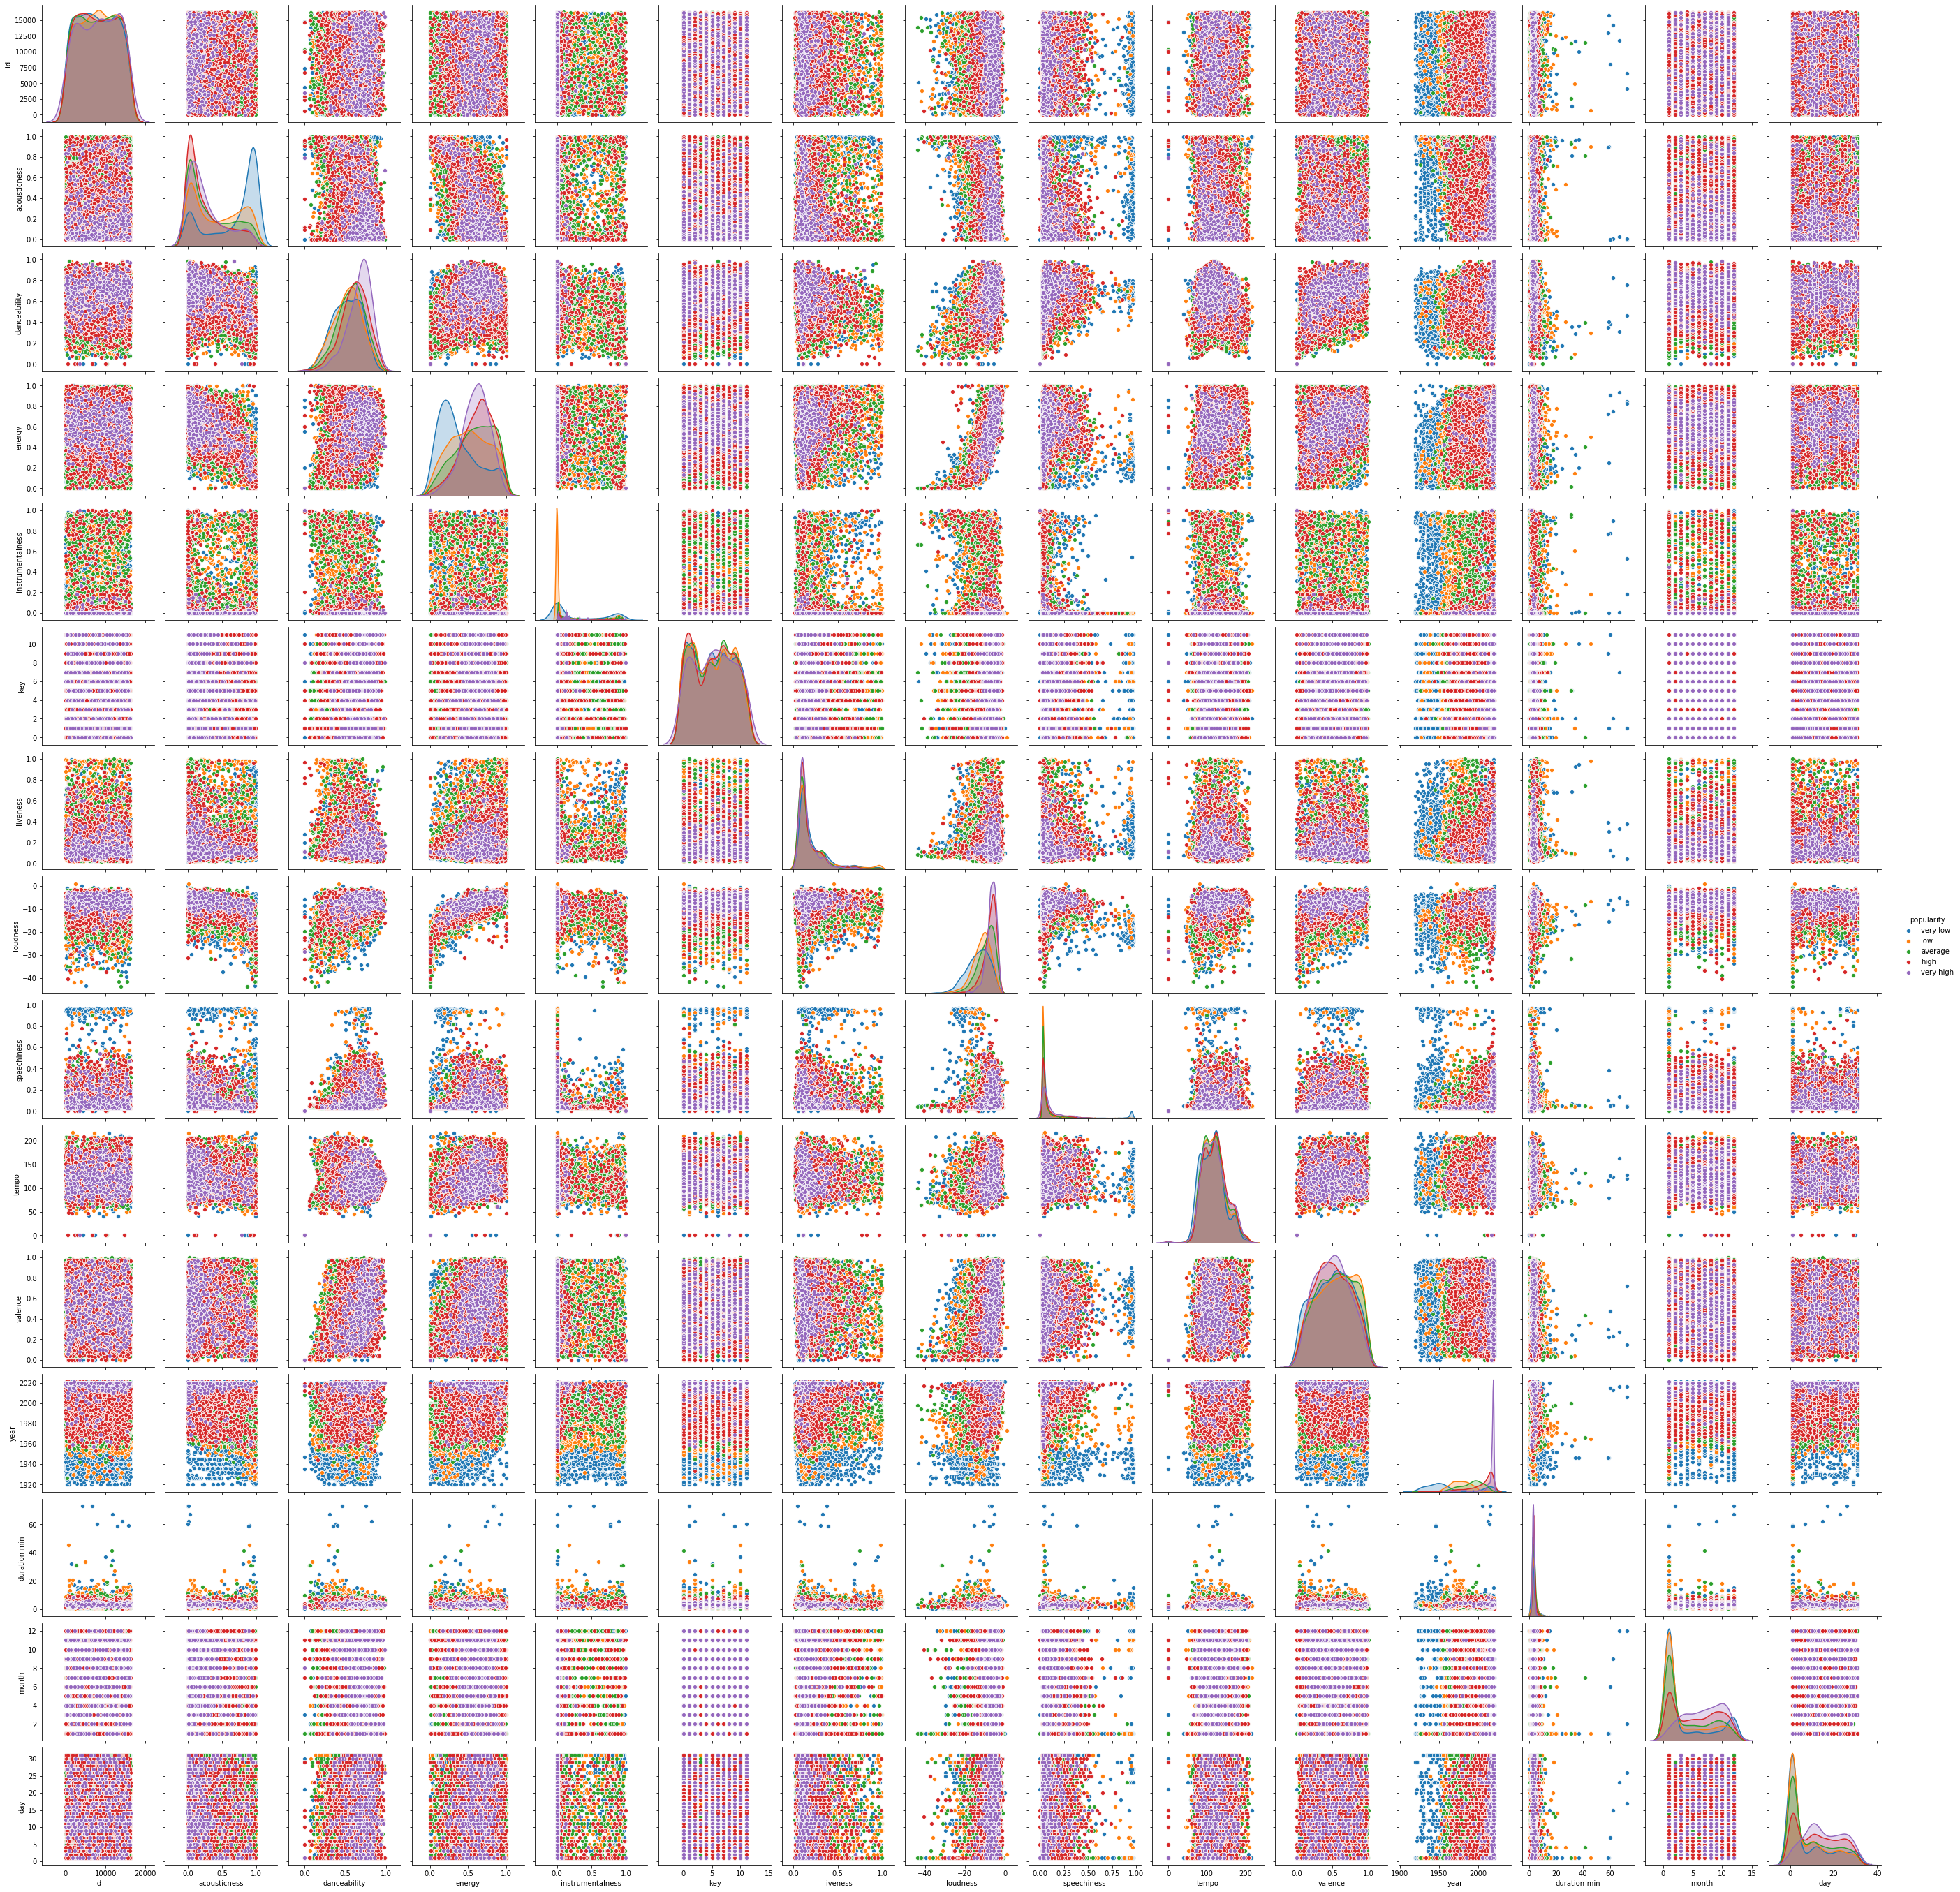

In [24]:
sns.pairplot(df, hue='popularity')

In [97]:
df['year'].unique()

array([1947, 2020, 1950, 1974, 1973, 1968, 1942, 2005, 1945, 1999, 2011,
       2018, 1969, 1980, 1988, 1993, 1958, 1987, 1984, 1967, 1926, 1959,
       2014, 1977, 1964, 2010, 1965, 2000, 1994, 1979, 1927, 1946, 1990,
       1925, 2009, 2015, 2019, 1981, 1998, 1935, 1949, 1957, 1983, 1997,
       1929, 1962, 2007, 1943, 1956, 1995, 2017, 1996, 1986, 1953, 2016,
       1963, 2012, 2004, 1941, 1976, 1970, 1930, 2013, 2002, 1934, 1940,
       1992, 2021, 1978, 1989, 1991, 2006, 2001, 1954, 1920, 1952, 2008,
       1985, 1931, 1975, 1966, 2003, 1955, 1961, 1936, 1972, 1960, 1951,
       1939, 1937, 1948, 1982, 1971, 1932, 1938, 1944, 1928, 1923, 1933,
       1924, 1922, 1921], dtype=int64)

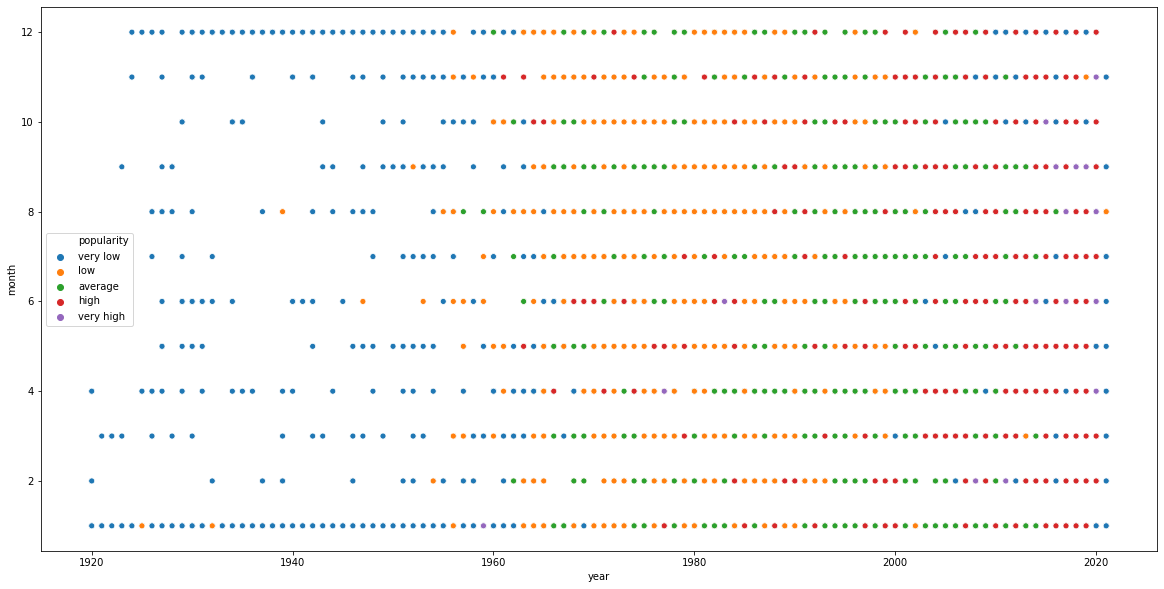

In [105]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='year',y='month',hue='popularity', data=df)

In [127]:
categorical_features=['explicit', 'mode']
categorical_features

['explicit', 'mode']

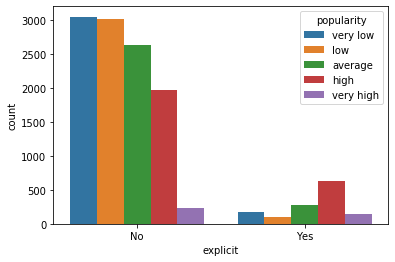

In [107]:
sns.countplot('explicit', data=df, hue='popularity')

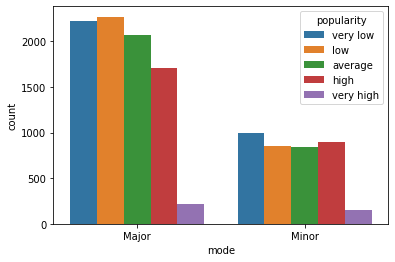

In [108]:
sns.countplot('mode', data=df, hue='popularity')

In [113]:
df.corr()

id  acousticness  danceability    energy  \
id                1.000000     -0.004270     -0.003289  0.014113   
acousticness     -0.004270      1.000000     -0.279666 -0.745551   
danceability     -0.003289     -0.279666      1.000000  0.206802   
energy            0.014113     -0.745551      0.206802  1.000000   
instrumentalness  0.006159      0.266340     -0.255456 -0.219329   
key               0.006183     -0.017331      0.029202  0.032616   
liveness          0.005288     -0.025139     -0.124919  0.133039   
loudness          0.006133     -0.577572      0.290771  0.780935   
speechiness      -0.008113     -0.027950      0.220842 -0.077581   
tempo             0.006620     -0.204745     -0.021408  0.232029   
valence          -0.001245     -0.169857      0.489044  0.334541   
year              0.016751     -0.561497      0.211403  0.485902   
duration-min      0.011124     -0.074264     -0.100782  0.049187   
month             0.018051     -0.205238      0.093828  0.200053   
day               0.004767     -0.197828      0.115088  0.195263   

                  instrumentalness       key  liveness  loudness  speechiness  \
id                        0.006159  0.006183  0.005288  0.006133    -0.008113   
acousticness              0.266340 -0.017331 -0.025139 -0.577572    -0.027950   
danceability             -0.255456  0.029202 -0.124919  0.290771     0.220842   
energy                   -0.219329  0.032616  0.133039  0.780935    -0.077581   
instrumentalness          1.000000 -0.018033 -0.019256 -0.377842    -0.111828   
key                      -0.018033  1.000000 -0.009158  0.025824     0.016876   
liveness                 -0.019256 -0.009158  1.000000  0.046952     0.112990   
loudness                 -0.377842  0.025824  0.046952  1.000000    -0.151779   
speechiness              -0.111828  0.016876  0.112990 -0.151779     1.000000   
tempo                    -0.088497  0.017476  0.014526  0.198197    -0.007979   
valence                  -0.196395  0.030784  0.001178  0.275841     0.042242   
year                     -0.198874  0.013956 -0.046131  0.501204    -0.155869   
duration-min              0.086143 -0.007858  0.028957  0.011920    -0.089063   
month                    -0.056609  0.001076  0.039363  0.221319     0.024104   
day                      -0.068032  0.005689  0.011302  0.221584     0.017819   

                     tempo   valence      year  duration-min     month  \
id                0.006620 -0.001245  0.016751      0.011124  0.018051   
acousticness     -0.204745 -0.169857 -0.561497     -0.074264 -0.205238   
danceability     -0.021408  0.489044  0.211403     -0.100782  0.093828   
energy            0.232029  0.334541  0.485902      0.049187  0.200053   
instrumentalness -0.088497 -0.196395 -0.198874      0.086143 -0.056609   
key               0.017476  0.030784  0.013956     -0.007858  0.001076   
liveness          0.014526  0.001178 -0.046131      0.028957  0.039363   
loudness          0.198197  0.275841  0.501204      0.011920  0.221319   
speechiness      -0.007979  0.042242 -0.155869     -0.089063  0.024104   
tempo             1.000000  0.135261  0.118400     -0.020554  0.044246   
valence           0.135261  1.000000 -0.091419     -0.148897 -0.023428   
year              0.118400 -0.091419  1.000000      0.052721  0.322428   
duration-min     -0.020554 -0.148897  0.052721      1.000000 -0.013856   
month             0.044246 -0.023428  0.322428     -0.013856  1.000000   
day               0.050483  0.000556  0.302604     -0.011359  0.625513   

                       day  
id                0.004767  
acousticness     -0.197828  
danceability      0.115088  
energy            0.195263  
instrumentalness -0.068032  
key               0.005689  
liveness          0.011302  
loudness          0.221584  
speechiness       0.017819  
tempo             0.050483  
valence           0.000556  
year              0.302604  
duration-min     -0.011359  
month             0.625513  
day               

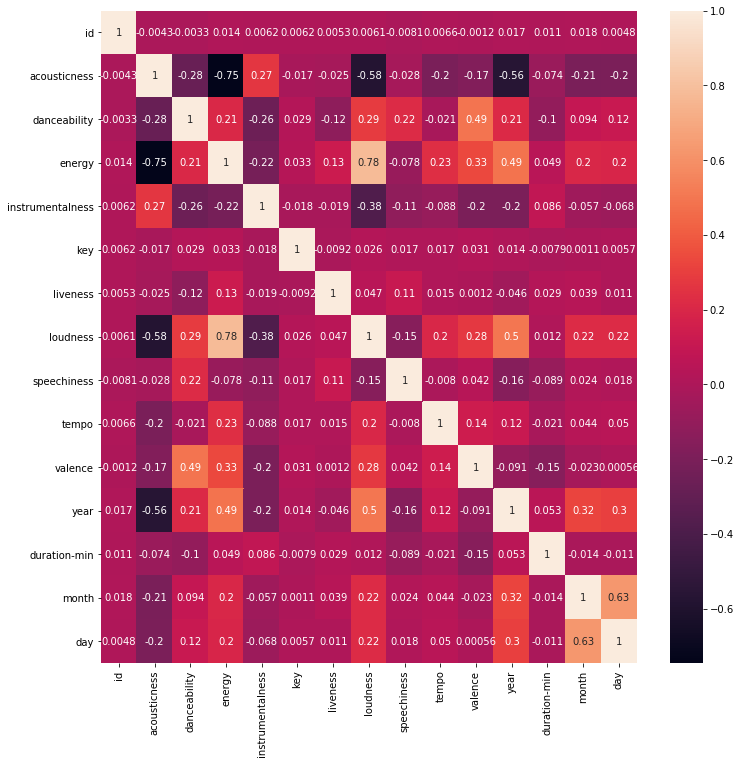

In [114]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax)

In [132]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [133]:
df=category_onehot_multcols(categorical_features)

explicit
mode


In [134]:
df

id  acousticness  danceability  energy  instrumentalness  key  \
0       2015        0.9490        0.2350  0.0276          0.927000    5   
1      15901        0.8550        0.4560  0.4850          0.088400    4   
2       9002        0.8270        0.4950  0.4990          0.000000    0   
3       6734        0.6540        0.6430  0.4690          0.108000    7   
4      15563        0.7380        0.7050  0.3110          0.000000    5   
...      ...           ...           ...     ...               ...  ...   
12222  15343        0.0408        0.8090  0.8010          0.000000    1   
12223   1701        0.9120        0.4510  0.2400          0.000002    1   
12224   3351        0.3280        0.5510  0.5640          0.002950    2   
12225   8879        0.1220        0.0608  0.9390          0.991000    1   
12226   9711        0.0380        0.3890  0.7680          0.000000    1   

       liveness  loudness release_date  speechiness    tempo  valence  year  \
0         0.513   -27.398   1947-01-01       0.0381  110.838  0.03980  1947   
1         0.151   -10.046   2020-11-13       0.0437  152.066  0.85900  2020   
2         0.401    -8.009   1950-01-01       0.0474  108.004  0.70900  1950   
3         0.218   -15.917   1974-04-30       0.0368   83.636  0.96400  1974   
4         0.322   -12.344   1973-01-01       0.0488  117.260  0.78500  1973   
...         ...       ...          ...          ...      ...      ...   ...   
12222     0.353    -5.461   2014-01-07       0.4070   81.940  0.74400  2014   
12223     0.175   -14.014   1959-01-01       0.0351  134.009  0.70100  1959   
12224     0.352    -9.298   1984-01-01       0.0338  124.883  0.89000  1984   
12225     0.912   -26.324   2017-09-01       0.1180   73.234  0.00558  2017   
12226     0.119    -4.765   2020-07-24       0.2560   90.146  0.33400  2020   

       duration-min popularity  month  day  Yes  Minor  
0               3.0   very low      1    1    0      0  
1               2.4        low     11   13    0      0  
2               2.6   very low      1    1    0      1  
3               2.4        low      4   30    0      0  
4               3.4    average      1    1    0      0  
...             ...        ...    ...  ...  ...    ...  
12222           3.4    average      1    7    0      0  
12223           2.0  very high      1    1    0      0  
12224           2.5        low      1    1    0      1  
12225           3.1       high      9    1    0      0  
12226           3.1       high      7   24    1      0  

[12227 rows x 19 columns]

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
df['popularity'] = le.fit_transform(df['popularity'])
df.head()

id  acousticness  danceability  energy  instrumentalness  key  liveness  \
0   2015         0.949         0.235  0.0276            0.9270    5     0.513   
1  15901         0.855         0.456  0.4850            0.0884    4     0.151   
2   9002         0.827         0.495  0.4990            0.0000    0     0.401   
3   6734         0.654         0.643  0.4690            0.1080    7     0.218   
4  15563         0.738         0.705  0.3110            0.0000    5     0.322   

   loudness release_date  speechiness    tempo  valence  year  duration-min  \
0   -27.398   1947-01-01       0.0381  110.838   0.0398  1947           3.0   
1   -10.046   2020-11-13       0.0437  152.066   0.8590  2020           2.4   
2    -8.009   1950-01-01       0.0474  108.004   0.7090  1950           2.6   
3   -15.917   1974-04-30       0.0368   83.636   0.9640  1974           2.4   
4   -12.344   1973-01-01       0.0488  117.260   0.7850  1973           3.4   

   popularity  month  day  Yes  Minor  
0           4      1    1    0      0  
1           2     11   13    0      0  
2           4      1    1    0      1  
3           2      4   30    0      0  
4           0      1    1    0      0

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                12227 non-null  int64         
 1   acousticness      12227 non-null  float64       
 2   danceability      12227 non-null  float64       
 3   energy            12227 non-null  float64       
 4   instrumentalness  12227 non-null  float64       
 5   key               12227 non-null  int64         
 6   liveness          12227 non-null  float64       
 7   loudness          12227 non-null  float64       
 8   release_date      12227 non-null  datetime64[ns]
 9   speechiness       12227 non-null  float64       
 10  tempo             12227 non-null  float64       
 11  valence           12227 non-null  float64       
 12  year              12227 non-null  int64         
 13  duration-min      12227 non-null  float64       
 14  popularity        1222

In [138]:
df=df.drop(columns='release_date')

In [149]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['popularity','id'])
Y = df['popularity']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [150]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [151]:
# model training
model.fit(x_train, y_train)

C:\Users\Parul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  40.28345598255655


In [153]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [154]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  55.30117198146633


In [159]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [160]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [161]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  52.49386753883892
